In [412]:
import os
import glob
import math
import torch
import random

import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from torchvision.utils import make_grid

In [416]:
def save_sample_results(seed, data_dir, results_dir, nr_samples, save=False):
    random.seed(seed)
    paths = glob.glob(os.path.join(data_dir, 'photo_jpg', '*.jpg'))
    results = glob.glob(os.path.join(results_dir, 'images', '*.jpg'))
    ncols = min(nr_samples*2, 6)
    nrows = math.ceil((nr_samples*2)/ncols)-1
    
    imgs = []
    for i in range(0, nr_samples, 2):
        sample = random.randint(0, len(paths))
        photo_p = paths[sample]
        monet_p = results[sample]
        photo = mpimg.imread(photo_p)
        monet = mpimg.imread(monet_p)
        imgs.append(photo)
        imgs.append(monet)
        
    imgs = np.array(imgs)
    imgs = np.swapaxes(imgs,1,3)
    imgs = np.swapaxes(imgs,2,3)
    t = torch.from_numpy(imgs)
    temp = make_grid(t, nrow=ncols, padding=1).permute(1, 2, 0).detach().numpy()
    temp = temp.astype(int)
    
    fig = plt.figure(figsize=(40, 30), facecolor='w')
    plt.imshow(temp)
    plt.axis('off')
    plt.title('Photo')
    if save:
        path = './results/stats/sample_results_{}.png'.format(nr_samples)
        fig.savefig(path)   # save the figure to file
        plt.close(fig)
    else:  
        plt.show()

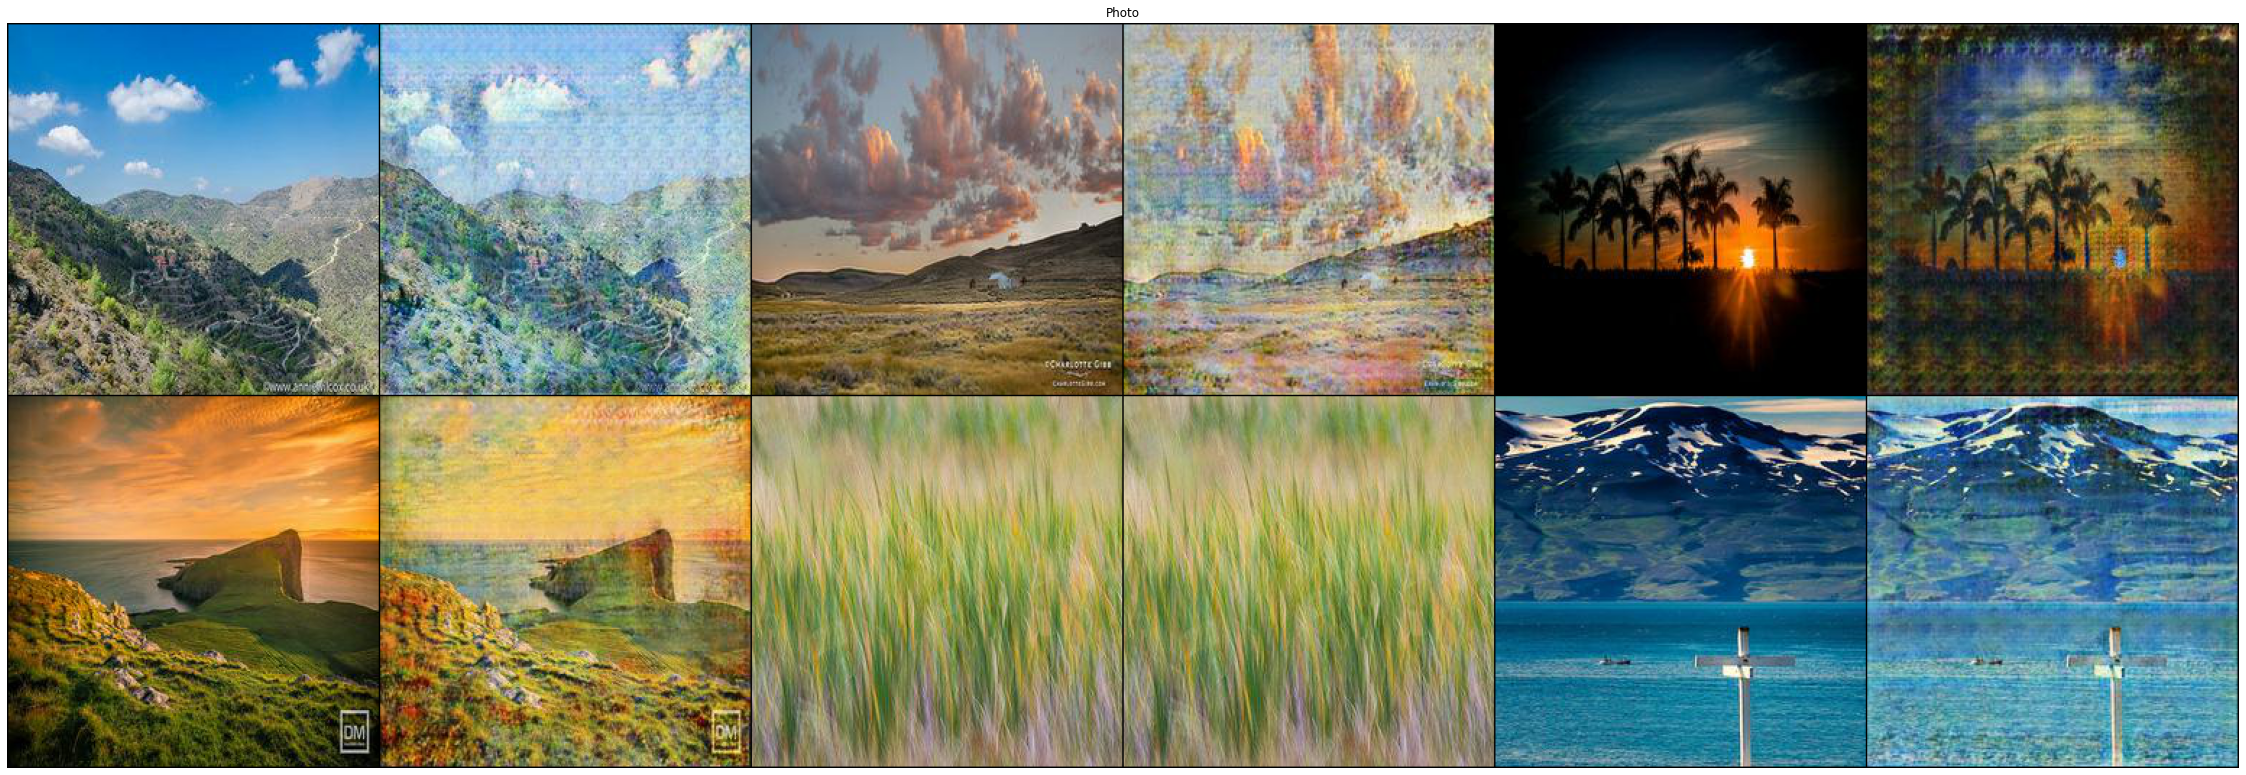

In [455]:
save_sample_results(82, './images', './results', 12)

In [197]:
def monet_display(seed, data_dir, nr_samples):
    random.seed(seed)
    paths = glob.glob(os.path.join(data_dir, 'monet_jpg', '*.jpg'))
    ncols = min(nr_samples*2, 6)
    nrows = math.ceil((nr_samples*2)/ncols)-1
    
    imgs = []
    for i in range(0, nr_samples):
        sample = random.randint(0, len(paths))
        monet_p = paths[sample]
        monet = mpimg.imread(monet_p)
        imgs.append(monet)
        
    imgs = np.array(imgs)
    imgs = np.swapaxes(imgs,1,3)
    imgs = np.swapaxes(imgs,2,3)
    t = torch.from_numpy(imgs)
    temp = make_grid(t, nrow=ncols, padding=1).permute(1, 2, 0).detach().numpy()
    temp = temp.astype(int)
    
    fig = plt.figure(figsize=(32, 22), facecolor='w')
    plt.imshow(temp)
    plt.axis('off')
    plt.title('Photo')
    plt.show()

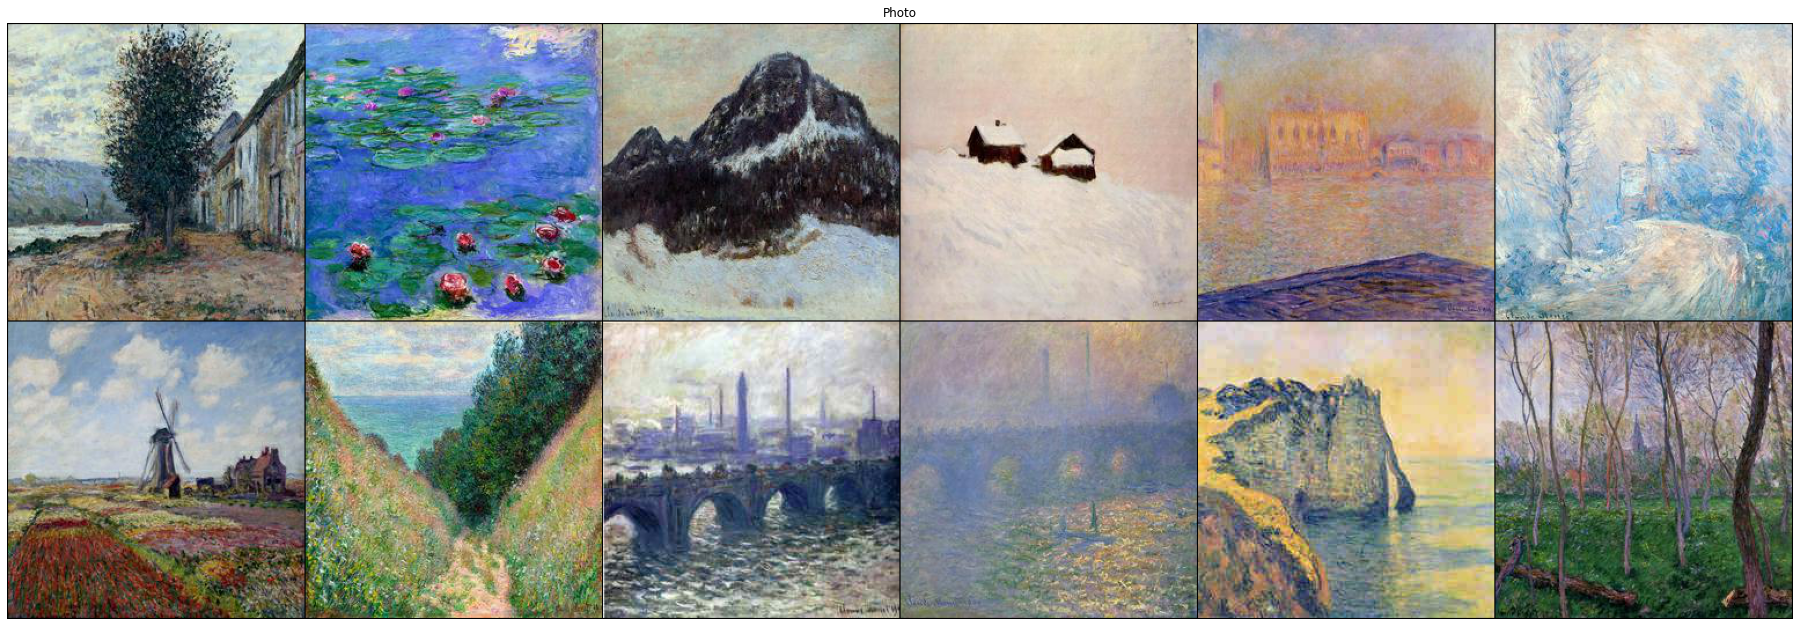

In [330]:
monet_display(356, './images', 12)